In [1]:
from box_simulation import *
%config InlineBackend.figure_format = 'retina'

# Simulation with constant temperature

## Initialize the simulation box

In [2]:
n_steps = 5000  # number of simulation steps we want to perform later on
box = box_simulation(5, 5, n_particles=9**2, n_steps=n_steps, particle_mass=0.018)
box.generate_particles(T=50)

Assigning velocities according to Maxwell Boltzmann distribution at T=50


## Minimise the energy of the system with steepest descent method for good starting positions

In [3]:
# run the steepest descent minimisation and save the positions
n_min = box.run_SD(step_length=0.01, plot_from=False)
box.save_particle_positions(n_min, filename="testSD.txt")
# load the particles positions which were saved in the minimisation in the previous step
box.load_particles(filename="testSD.txt", v=10000, T=0)

Steepest descent minimisation finished at step 131
Saved the particle positions of step 131 to file 'testSD.txt'
The initial state loaded from the file 'testSD.txt'


## Run a MD simulation

In [4]:
# run the MD simulation
box.MD_simulation(step_interval=2e-6, upper_cutoff=0.9, T=100)

100%|██████████| 5000/5000 [00:22<00:00, 225.36it/s]


## Evolution of kinetic and potential energy

When keeping the temperature more or less constant with a thermostat, the kinetic energy fluctuates around the desired value.

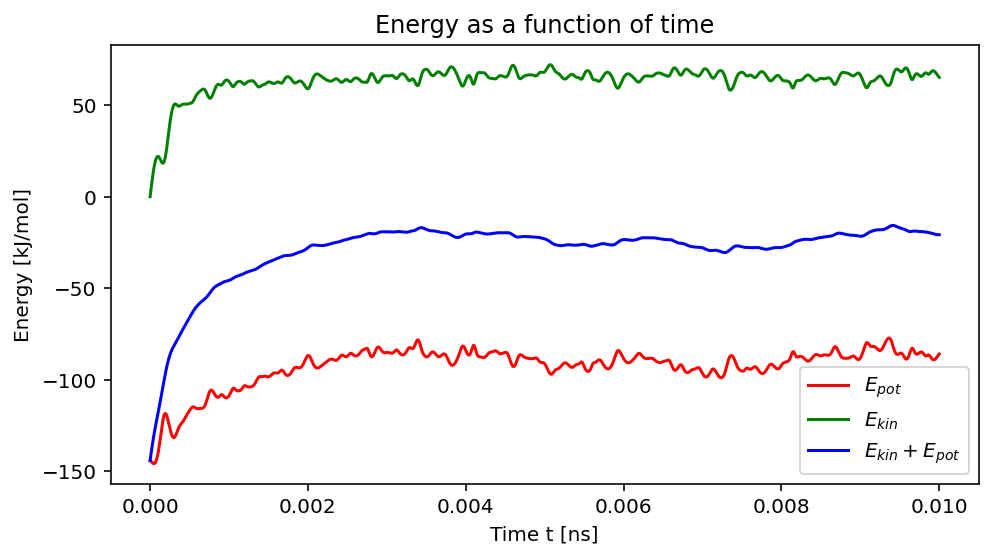

In [5]:
box.plot_energies()

## Animation of the movement of the particles dynamics

In [6]:
box.animate_trajectories(ms_between_frames=20, steps_per_frame=20, saveas="constant_temperature.gif")

(81, 251)
Saving as .gif


# Simulation with constant total energy

In the cells below, the same simulation as before is carried out, with the difference of having constant total energy, i.e. not using a thermostat.

In [7]:
n_steps = 5000  # number of simulation steps we want to perform later on
box = box_simulation(5, 5, n_particles=9**2, n_steps=n_steps, particle_mass=0.018)
box.generate_particles()
# run the steepest descent minimisation and save the positions
n_min = box.run_SD(step_length=0.01, plot_from=False)
box.save_particle_positions(n_min, filename="testSD.txt")
# load the particles positions which were saved in the minimisation in the previous step
box.load_particles(filename="testSD.txt", v=10000, T=0)
# run the MD simulation
box.MD_simulation(step_interval=2e-6, upper_cutoff=0.9, T=0)

  0%|          | 22/5000 [00:00<00:23, 216.43it/s]

Steepest descent minimisation finished at step 120
Saved the particle positions of step 120 to file 'testSD.txt'
The initial state loaded from the file 'testSD.txt'


100%|██████████| 5000/5000 [00:21<00:00, 233.54it/s]


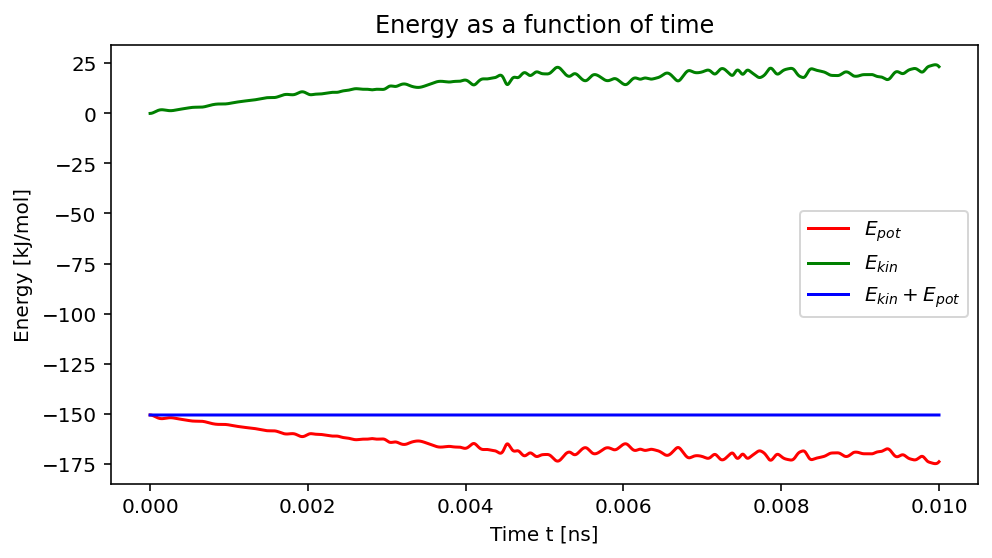

(81, 251)
Saving as .gif


In [8]:
box.plot_energies()
box.animate_trajectories(ms_between_frames=20, steps_per_frame=20, saveas="constant_energy.gif")